In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split, GridSearchCV

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import statistics

In [2]:
import sklearn
print(sklearn.__version__)

0.24.2


In [3]:
battle = pd.read_csv('./data/battles.csv')
death = pd.read_csv('./data/character-deaths.csv')
prediction = pd.read_csv('./data/character-predictions.csv')

In [4]:
battle.columns 
# ['name', 'year', 'battle_number', 'attacker_king', 'defender_king', 'attacker_1', 'attacker_2', 'attacker_3', 'attacker_4', 
#  'defender_1', 'defender_2', 'defender_3', 'defender_4', 'attacker_outcome', 'battle_type', 'major_death', 'major_capture', 
#  'attacker_size','defender_size', 'attacker_commander', 'defender_commander', 'summer', 'location', 'region', 'note']

death.columns
# ['Name', 'Allegiances', 'Death Year', 'Book of Death', 'Death Chapter', 'Book Intro Chapter', 'Gender', 'Nobility', 
# 'GoT', 'CoK', 'SoS', 'FfC', 'DwD']

prediction.columns
# ['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male', 'culture', 'dateOfBirth', 'DateoFdeath', 
#  'mother', 'father', 'heir', 'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5', 'isAliveMother', 
#  'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
#  'isPopular', 'popularity', 'isAlive']

Index(['S.No', 'actual', 'pred', 'alive', 'plod', 'name', 'title', 'male',
       'culture', 'dateOfBirth', 'DateoFdeath', 'mother', 'father', 'heir',
       'house', 'spouse', 'book1', 'book2', 'book3', 'book4', 'book5',
       'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse',
       'isMarried', 'isNoble', 'age', 'numDeadRelations', 'boolDeadRelations',
       'isPopular', 'popularity', 'isAlive'],
      dtype='object')

In [5]:
battle.drop(['name','battle_number','attacker_3','attacker_4','defender_2','defender_3','defender_4','location','note'],axis=1).head(5)
data_attack = pd.merge(death, battle, left_on='Allegiances', right_on='attacker_1')
data_defend = pd.merge(death, battle, left_on='Allegiances', right_on='defender_1')

display(len(death))
display(len(data_attack))
display(data_attack.head())

917

1925

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN
3,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,...,0.0,0.0,NaN,NaN,Gregor Clegane,Lyman Darry,1.0,Darry,The Riverlands,NaN
4,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,...,0.0,0.0,20000.0,10000.0,"Tywin Lannister, Flement Brax, Gregor Clegane,...","Edmure Tully, Jason Mallister, Karyl Vance",1.0,Red Fork,The Riverlands,NaN


In [6]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 93.3+ KB


In [7]:
battle.drop(['name','attacker_2','attacker_3','attacker_4','defender_2','defender_3','defender_4','note'],axis=1).info()
# battle.major_death

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                38 non-null     int64  
 1   battle_number       38 non-null     int64  
 2   attacker_king       36 non-null     object 
 3   defender_king       35 non-null     object 
 4   attacker_1          38 non-null     object 
 5   defender_1          37 non-null     object 
 6   attacker_outcome    37 non-null     object 
 7   battle_type         37 non-null     object 
 8   major_death         37 non-null     float64
 9   major_capture       37 non-null     float64
 10  attacker_size       24 non-null     float64
 11  defender_size       19 non-null     float64
 12  attacker_commander  37 non-null     object 
 13  defender_commander  28 non-null     object 
 14  summer              37 non-null     float64
 15  location            37 non-null     object 
 16  region    

In [8]:
data = death
# data = data_attack
# data = data_defend

# 將data中的'Death Year' , 'Book of Death' , 'Death Chapter'，以1/0表示有沒有值，
# 並存為'has_DeathYear' , 'has_BookofDeath' , 'has_DeathChapter'
data['has_DeathYear'] = 1
data['has_BookofDeath'] = 1
data['has_DeathChapter'] = 1

data.loc[data['Death Year'].isna()==True, 'has_DeathYear'] = 0 
data.loc[data['Book of Death'].isna()==True, 'has_BookofDeath'] = 0 
data.loc[data['Death Chapter'].isna()==True, 'has_DeathChapter'] = 0 
display(data[['Death Year', 'has_DeathYear' , 'Book of Death', 'has_BookofDeath' , 'Death Chapter', 'has_DeathChapter']].head(5))

,Death Year,has_DeathYear,Book of Death,has_BookofDeath,Death Chapter,has_DeathChapter
0,NaN,0,NaN,0,NaN,0
1,299.0,1,3.0,1,51.0,1
2,NaN,0,NaN,0,NaN,0
3,300.0,1,5.0,1,20.0,1
4,NaN,0,NaN,0,NaN,0


In [9]:
# 空值填上0
data['Death Year'] = data['Death Year'].fillna(0)
data['Book of Death'] = data['Book of Death'].fillna(0)
data['Death Chapter'] = data['Death Chapter'].fillna(0)
data['Book Intro Chapter'] = data['Book Intro Chapter'].fillna(0)

display(data.head(5))

,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,has_DeathYear,has_BookofDeath,has_DeathChapter
0,Addam Marbrand,Lannister,0.0,0.0,0.0,56.0,1,1,1,1,1,1,0,0,0,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0,1,1,1
2,Aegon Targaryen,House Targaryen,0.0,0.0,0.0,5.0,1,1,0,0,0,0,1,0,0,0
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1,1,1,1
4,Aemon Costayne,Lannister,0.0,0.0,0.0,0.0,1,1,0,0,1,0,0,0,0,0


In [10]:
label = LabelEncoder()
data['Alle'] = label.fit_transform(data['Allegiances'])
display(data[['Allegiances','Alle']])
# display(data['Gender'])

,Allegiances,Alle
0,Lannister,12
1,None,15
2,House Targaryen,9
3,House Greyjoy,5
4,Lannister,12
...,...,...
912,None,15
913,None,15
914,None,15
915,Wildling,20


In [11]:
# 將資料中的Allegiances特徵轉為dummy型態
Allegiance = data['Allegiances'].unique()
print('num of Allegiances = {}'.format(len(Allegiance)))
print('original num of data columns = {}'.format(len(data.columns)))

data = pd.concat([data, pd.get_dummies(data['Allegiances'])], axis=1)
data.columns
print('new num of data columns = {}'.format(len(data.columns)))

num of Allegiances = 21
original num of data columns = 17
new num of data columns = 38


In [12]:
# 切分訓練集和測試集
train, test = train_test_split(data, test_size=0.25)
print('data size = {}'.format(len(data)))
print('train size = {}'.format(len(train)))
print('test size = {}'.format(len(test)))
# display(train.head(5))

data size = 917
train size = 687
test size = 230


In [13]:
# 使用決策樹
predict_var = 'Death Year' , 'Book of Death' , 'Death Chapter'
# feature = ['Book Intro Chapter', 'Gender', 'Nobility', 'GoT', 'CoK', 'SoS', 'FfC',
#            'DwD', 'has_DeathYear', 'has_BookofDeath', 'has_DeathChapter', 'Arryn',
#        'Baratheon', 'Greyjoy', 'House Arryn', 'House Baratheon',
#        'House Greyjoy', 'House Lannister', 'House Martell', 'House Stark',
#        'House Targaryen', 'House Tully', 'House Tyrell', 'Lannister',
#        'Martell', 'Night\'s Watch', 'None', 'Stark', 'Targaryen', 'Tully',
#        'Tyrell', 'Wildling']
# feature = ['Alle','has_DeathYear', 'has_BookofDeath', 'has_DeathChapter']
feature = ['Alle','has_DeathYear', 'has_BookofDeath', 'has_DeathChapter','GoT','CoK','SoS', 'FfC','DwD']

# feature = ['Alle','has_DeathYear', 'has_BookofDeath', 'has_DeathChapter','GoT','CoK','SoS','FfC','DwD','Gender','Nobility',
#            'Book Intro Chapter']

In [14]:
result_acc, result_prec, result_rec = [], [], []

for i in range(50):
    train, test = train_test_split(data, test_size=0.25)

    x1 = train[feature]
    y1 = train[predict_var[0]]
    clf_1 = DecisionTreeClassifier(random_state=i,max_depth=15, min_samples_leaf=5)
    clf_1 = clf_1.fit(x1,y1)

    y1_prediction = clf_1.predict(test[feature])


    accuracy_1 = metrics.accuracy_score(test[predict_var[0]], y1_prediction).round(4)
    precision_1 = metrics.precision_score(test[predict_var[0]], y1_prediction,average='weighted').round(4)
    recall_1 = metrics.recall_score(test[predict_var[0]], y1_prediction,average='weighted').round(4)
    
    result_acc.append(accuracy_1)
    result_prec.append(precision_1)
    result_rec.append(recall_1)
    
print(statistics.mean(result_acc))
print(statistics.mean(result_prec))
print(statistics.mean(result_rec))

0.947044
0.946598
0.947044


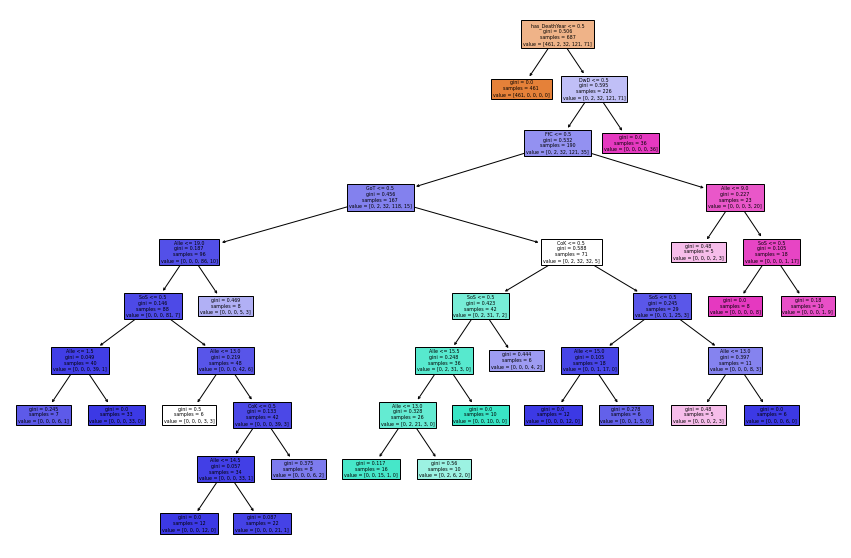

In [15]:
plt.figure(figsize=(15, 10))
plot_tree(clf_1, feature_names=feature, filled=True)
plt.show()

In [16]:
result_acc, result_prec, result_rec = [], [], []

for i in range(50):
    train, test = train_test_split(data, test_size=0.25)
    x2 = train[feature]
    y2 = train[predict_var[1]]

    clf_2 = DecisionTreeClassifier(random_state=i, max_depth=15)
    clf_2 = clf_2.fit(x2,y2)

    y2_prediction = clf_2.predict(test[feature])

    accuracy_2 = metrics.accuracy_score(test[predict_var[1]], y2_prediction).round(4)
    precision_2 = metrics.precision_score(test[predict_var[1]], y2_prediction,average='weighted').round(4)
    recall_2 = metrics.recall_score(test[predict_var[1]], y2_prediction,average='weighted').round(4)
    
    result_acc.append(accuracy_2)
    result_prec.append(precision_2)
    result_rec.append(recall_2)
    
print(statistics.mean(result_acc))
print(statistics.mean(result_prec))
print(statistics.mean(result_rec))

0.970012
0.972094
0.970012


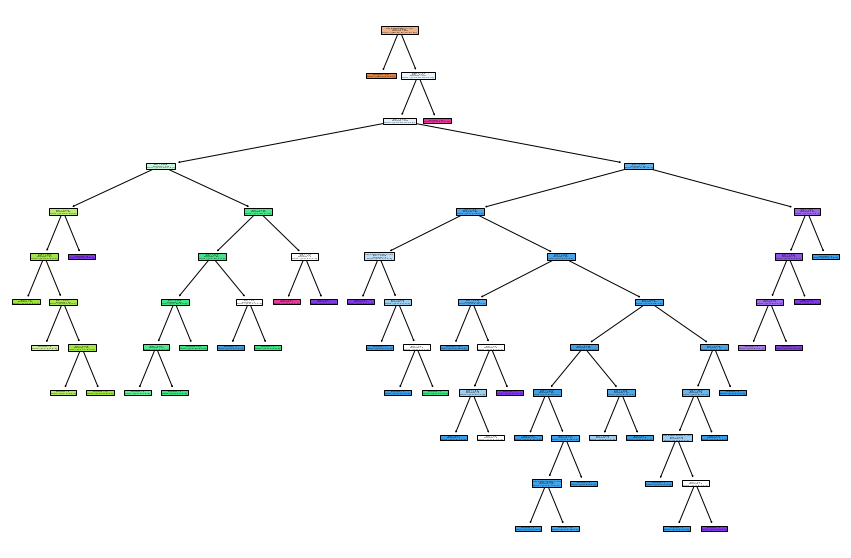

In [17]:
plt.figure(figsize=(15, 10))
plot_tree(clf_2, feature_names=feature, filled=True)
plt.show()

In [18]:
result_acc, result_prec, result_rec = [], [], []

for i in range(50):
    train, test = train_test_split(data, test_size=0.25)

    x3 = train[feature]
    y3 = train[predict_var[2]]

    clf_3 = DecisionTreeClassifier(max_depth=15)
    clf_3 = clf_3.fit(x3,y3)

    y3_prediction = clf_3.predict(test[feature])

    accuracy_3 = metrics.accuracy_score(test[predict_var[2]], y3_prediction).round(4)
    precision_3 = metrics.precision_score(test[predict_var[2]], y3_prediction,average='weighted').round(4)
    recall_3 = metrics.recall_score(test[predict_var[2]], y3_prediction,average='weighted').round(4)
    
    result_acc.append(accuracy_3)
    result_prec.append(precision_3)
    result_rec.append(recall_3)
    
print(statistics.mean(result_acc))
print(statistics.mean(result_prec))
print(statistics.mean(result_rec))

0.734436
0.733228
0.734436


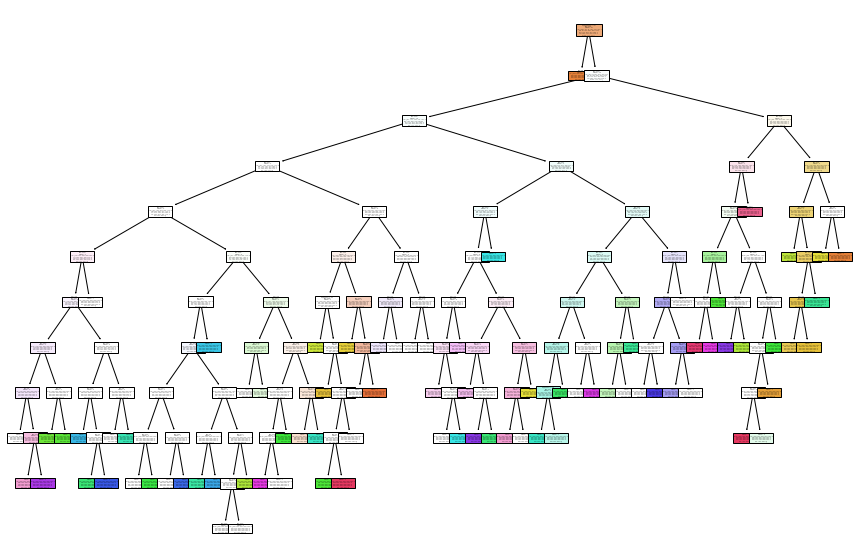

In [19]:
plt.figure(figsize=(15, 10))
plot_tree(clf_3, feature_names=feature, filled=True)
plt.show()